<a href="https://colab.research.google.com/github/rahul-lyukbot/Food_vision_first/blob/main/Food_vison_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!wget https://raw.githubusercontent.com/rahul-lyukbot/Helping_material/master/helping_function.py


--2022-06-20 11:12:01--  https://raw.githubusercontent.com/rahul-lyukbot/Helping_material/master/helping_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10247 (10K) [text/plain]
Saving to: ‘helping_function.py.1’

helping_function.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-20 11:12:01 (79.2 MB/s) - ‘helping_function.py.1’ saved [10247/10247]



In [58]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-72058daa-433e-4c3b-6cdf-7dcb2a7cb455)


In [59]:
from helping_function import *

# Project - Food Vision(using food101 dataset from tensroflow dataset)

In [60]:
import tensorflow as tf
import tensorflow_datasets as tfds

## loading datasets food101 from tensroflow_datasets

In [61]:
(train_data, test_data), ds_info  = tfds.load(name="food101",
                                              split = ["train", "validation"],
                                              shuffle_files = True,
                                              as_supervised = True,
                                              with_info = True)

## Getting familiar with our datasets
  * look to the features of our dataset/Becoming one with out dataset we have to find that:

    1. Class names
    2. Shape of input data
    3. Datatype of input data
    4. Labels(how they look like is they are one hot encoded or label encoded)
    5. Do the labels match with the class names

In [62]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [63]:
# classes/labels of our datasets
class_names = ds_info.features["label"].names
class_names[:]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [64]:
# take one sample of our train dataset
sample_1 = train_data.take(1)
sample_1

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [65]:
# checking the information of our sample
for image,label in sample_1:
  print(f"""
  Image shape: {image.shape}
  Image Datatype: {image.dtype}
  Target class in tensor form: {label}
  Class name(int str form): {class_names[label.numpy()]}  
  
  """)


  Image shape: (489, 512, 3)
  Image Datatype: <dtype: 'uint8'>
  Target class in tensor form: 90
  Class name(int str form): spaghetti_bolognese  
  
  


## plot image to verify our dataset have correct labels

In [66]:
import matplotlib.pyplot as plt

In [67]:
# make a function to view sample images
def view_img(sample, size = (10,7)):
  for image, label in sample:
    fig = plt.figure(figsize = size)
    ax = fig.add_axes([0,0,1,1])
    ax.imshow(image)
    plt.title(class_names[label.numpy()])
    plt.axis(False)

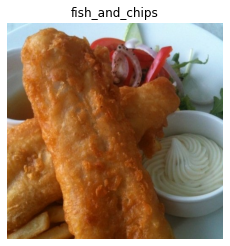

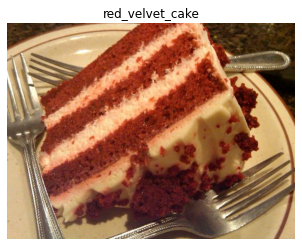

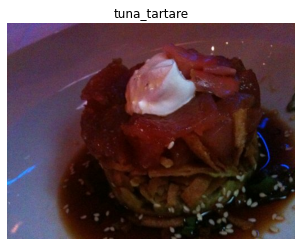

In [68]:
view_img(sample = train_data.take(3), size = (5,3))

## Preprocessing our data
    here we not scaling our image beacause we use efficientnet neural network as our base model

In [69]:
def prep_img(image, label, img_size = 224):
  """
    params:
      image - get the image tensor from the dataset
      label - label of each sample from our dataset
      img_size - size of all sample in the dataset by default 224
    
    return:
        preprocessed image in our desired shape,type and into batches
  """

  img = tf.image.resize(image, [img_size, img_size])
  return tf.cast(img, tf.float32), label

In [70]:
# preprocess one sample of our data
preprocessed_img = prep_img(image,label)[0]
print(f"""
img before preprocess:
{image}
img shape : {image.shape}
img Datatype : {image.dtype}

img after preprocess:
{preprocessed_img}
img shape: {preprocessed_img.shape}
img Datatype: {preprocessed_img.dtype}
""")


img before preprocess:
[[[ 83  71  45]
  [ 81  69  43]
  [ 80  68  44]
  ...
  [186 183 142]
  [188 185 144]
  [185 182 141]]

 [[ 86  74  48]
  [ 83  71  45]
  [ 82  70  46]
  ...
  [180 177 136]
  [179 176 135]
  [182 179 138]]

 [[ 88  76  52]
  [ 87  75  51]
  [ 85  73  49]
  ...
  [188 185 144]
  [186 183 142]
  [187 184 143]]

 ...

 [[162 163 168]
  [164 165 170]
  [171 170 176]
  ...
  [ 75  74  56]
  [ 67  66  48]
  [ 64  63  45]]

 [[168 169 174]
  [175 176 181]
  [167 166 172]
  ...
  [ 79  78  60]
  [ 74  73  55]
  [ 79  78  60]]

 [[182 183 188]
  [178 179 184]
  [163 164 169]
  ...
  [ 75  74  56]
  [ 72  71  53]
  [ 66  65  47]]]
img shape : (489, 512, 3)
img Datatype : <dtype: 'uint8'>

img after preprocess:
[[[ 83.108574  71.108574  45.108578]
  [ 82.11161   70.11161   46.11161 ]
  [ 84.873245  72.873245  49.30182 ]
  ...
  [191.5464   188.5464   147.5464  ]
  [184.01991  181.01991  140.01991 ]
  [182.87247  179.87247  138.87247 ]]

 [[ 87.08051   75.08051   51.080517

## Batch & Prepare dataset

In [71]:
# map preprocessing function to training
train_data = train_data.map(map_func = prep_img, num_parallel_calls=tf.data.AUTOTUNE)
# shuffle and batching our train data
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)          # if you have lot's of memory you can shuffle it as the len of our data

# same for testing data
test_data = test_data.map(map_func = prep_img, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [72]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## creating modeling callback
  some of thems are
  1. tensorboard callback
  2. modelcheckpoint callback
  3. earlystopping callback

In [73]:
# model checkpoint
checkpoint_path  = "model_checkpoint/cp.ckpt"
Model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = "val_acc",
                                                      save_best_only = True,
                                                      save_weights_only = True)

## Mixed precision training
    mixed precision training utilize the gpu and using both floating pointer float16 & float32

In [74]:
# trun on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

## Build feature extraction model

In [75]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [20]:
# Setting up the input shape
input_shape = (224,224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Creating input layer
inputs = layers.Input(shape=input_shape, name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype = tf.float32, name="softmaxt_float32")(x)

# Creating model
model_foodvision = tf.keras.Model(inputs,outputs)

# Compile the model
model_foodvision.compile(loss="sparse_categorical_crossentropy",
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


In [21]:
model_foodvision.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmaxt_float32 (Activatio  (None, 101)              0         
 n)                                                              
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

### check out the layers datatypes
  Due to mixed precision training some layers of our model is on float16 pointer and some on float32 pointer let's checkout all layer datatype

In [22]:
for layer in model_foodvision.layers:
  print( layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmaxt_float32 True float32 <Policy "float32">


**Going throug above we get:**

  `layer.name` - human readable form of layer

  `layer.trainable` - is the layer is trainable or not(if false it means the weights are frozen)

  `layer.dtype` - data type which the value is stored by layer

  `layer.dtype_policy` - the datatype policy of layer which its computes

In [23]:
# let's finding same attributes of our base model
for layer_number, layer in enumerate(base_model.layers):
  print(f"{layer_number} layer_name: {layer.name},   Trainable:{layer.trainable},   Datatype:{layer.dtype},   Datatype Policy:{layer.dtype_policy}")

0 layer_name: input_1,   Trainable:False,   Datatype:float32,   Datatype Policy:<Policy "float32">
1 layer_name: rescaling,   Trainable:False,   Datatype:float32,   Datatype Policy:<Policy "mixed_float16">
2 layer_name: normalization,   Trainable:False,   Datatype:float32,   Datatype Policy:<Policy "mixed_float16">
3 layer_name: stem_conv_pad,   Trainable:False,   Datatype:float32,   Datatype Policy:<Policy "mixed_float16">
4 layer_name: stem_conv,   Trainable:False,   Datatype:float32,   Datatype Policy:<Policy "mixed_float16">
5 layer_name: stem_bn,   Trainable:False,   Datatype:float32,   Datatype Policy:<Policy "mixed_float16">
6 layer_name: stem_activation,   Trainable:False,   Datatype:float32,   Datatype Policy:<Policy "mixed_float16">
7 layer_name: block1a_dwconv,   Trainable:False,   Datatype:float32,   Datatype Policy:<Policy "mixed_float16">
8 layer_name: block1a_bn,   Trainable:False,   Datatype:float32,   Datatype Policy:<Policy "mixed_float16">
9 layer_name: block1a_activ

## Fit the  model

In [24]:
initial_epochs = 5     # setting the initial epochs for future fine tuning our model
history_foodvision = model_foodvision.fit(train_data,
                                          steps_per_epoch = len(train_data),
                                          epochs = initial_epochs,
                                          validation_data =test_data,
                                          validation_steps = int(0.15*len(test_data)),
                                          callbacks = [create_tensorboard_callback("food_vision_training_logs", "food_vision"), Model_checkpoint])

Saving TensorBoard log files to: food_vision_training_logs/food_vision/20220620-102116
Epoch 1/5
2368/2368 [==============================] - ETA: 0s - loss: 1.8222 - accuracy: 0.5581WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 188s 71ms/step - loss: 1.8222 - accuracy: 0.5581 - val_loss: 1.2350 - val_accuracy: 0.6766
Epoch 2/5
2367/2368 [============================>.] - ETA: 0s - loss: 1.2929 - accuracy: 0.6663WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 169s 71ms/step - loss: 1.2930 - accuracy: 0.6663 - val_loss: 1.1198 - val_accuracy: 0.6984
Epoch 3/5
2368/2368 [==============================] - ETA: 0s - loss: 1.1430 - accuracy: 0.7018WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 166s 69ms/step - loss: 1.1430 - accuracy: 0.7018 - val_loss: 1.0815 - val_accuracy: 0.7119
Epoch 4/5
2367/2368 [============================>.] - ETA: 0s - loss: 1.0457 - accuracy: 0.7264WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 163s 68ms/step - loss: 1.0456 - accuracy: 0.7265 - val_loss: 1.0661 - val_accuracy: 0.7148
Epoch 5/5
2367/2368 [============================>.] - ETA: 0s - loss: 0.9723 - accuracy: 0.7450WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 164s 69ms/step - loss: 0.9723 - accuracy: 0.7450 - val_loss: 1.0551 - val_accuracy: 0.7087


In [25]:
result_foodvision = model_foodvision.evaluate(test_data)

790/790 [==============================] - 49s 62ms/step - loss: 1.0633 - accuracy: 0.7095


## Save feature extraction model to our google drive

In [26]:
import os

In [27]:
save_dir = "drive/MyDrive/Projects/food_vision_feature_extraction"
model_foodvision.save(save_dir)

INFO:tensorflow:Assets written to: drive/MyDrive/Projects/food_vision_feature_extraction/assets


INFO:tensorflow:Assets written to: drive/MyDrive/Projects/food_vision_feature_extraction/assets


## loading saved model and evaluate it on test data

In [28]:
loaded_foodvision = tf.keras.models.load_model(save_dir)

In [29]:
loaded_foodvision_result = loaded_foodvision.evaluate(test_data)

790/790 [==============================] - 50s 62ms/step - loss: 1.0633 - accuracy: 0.7095


✅**compare result of foodvision feature extraction model with loaded model result**

In [30]:
import numpy as np
np.isclose(a = result_foodvision, b=loaded_foodvision_result)

array([ True,  True])

🤔 Here we get some 0.03% difference validation accuracy between our loaded model and our feature extraction model

In [31]:
# now let's check our loded model dtype policy
for layer in loaded_foodvision.layers:
  print(layer.dtype_policy)

<Policy "float32">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "float32">


## Fine tune our model
    * to improve it's performence

### Creating callbaacks for our fine tune models
  here we are using 3 types of callbacks
  1. tenosorboard callbacks
  2. model_checkpoint callbacks
  3. early_stopping callbacks

### Early stopping callbacks

In [32]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

### Model checkpoint callbacks

In [33]:
path = "/content/drive/MyDrive/Projects/cp.ckpt"
Modl_chckpoint = tf.keras.callbacks.ModelCheckpoint(filepath = path,
                                                    monitor="val_loss",
                                                    save_best_only=True)

### Unfreeze all layers

In [34]:
for layer in base_model.layers:
  layer.trainable = True

In [35]:
# Check out is is layer are trainable
for layer_numbe, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

236 input_1 True
236 rescaling True
236 normalization True
236 stem_conv_pad True
236 stem_conv True
236 stem_bn True
236 stem_activation True
236 block1a_dwconv True
236 block1a_bn True
236 block1a_activation True
236 block1a_se_squeeze True
236 block1a_se_reshape True
236 block1a_se_reduce True
236 block1a_se_expand True
236 block1a_se_excite True
236 block1a_project_conv True
236 block1a_project_bn True
236 block2a_expand_conv True
236 block2a_expand_bn True
236 block2a_expand_activation True
236 block2a_dwconv_pad True
236 block2a_dwconv True
236 block2a_bn True
236 block2a_activation True
236 block2a_se_squeeze True
236 block2a_se_reshape True
236 block2a_se_reduce True
236 block2a_se_expand True
236 block2a_se_excite True
236 block2a_project_conv True
236 block2a_project_bn True
236 block2b_expand_conv True
236 block2b_expand_bn True
236 block2b_expand_activation True
236 block2b_dwconv True
236 block2b_bn True
236 block2b_activation True
236 block2b_se_squeeze True
236 block2b_s

### Compile the model

In [36]:
model_foodvision.compile(loss="sparse_categorical_crossentropy",
                         optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                         metrics=["accuracy"])

## Fit the fine version of foodvision model

In [37]:
# Setting fine tune epochs
finetune_epochs = initial_epochs + 100
foodvison_fine_tune_history = model_foodvision.fit(train_data,
                                                   steps_per_epoch= len(train_data),
                                                   epochs=finetune_epochs,
                                                   validation_data = test_data,
                                                   validation_steps = int(0.15*len(test_data)),
                                                   initial_epoch = history_foodvision.epoch[-1],
                                                   callbacks = [create_tensorboard_callback("drive/MyDrive/Projects/logs", "Food_vision_fine_tune"),
                                                                Modl_chckpoint,
                                                                early_stopping])

Saving TensorBoard log files to: drive/MyDrive/Projects/logs/Food_vision_fine_tune/20220620-103904
Epoch 5/105
2367/2368 [============================>.] - ETA: 0s - loss: 0.8358 - accuracy: 0.7866INFO:tensorflow:Assets written to: /content/drive/MyDrive/Projects/cp.ckpt/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Projects/cp.ckpt/assets


2368/2368 [==============================] - 211s 86ms/step - loss: 0.8358 - accuracy: 0.7866 - val_loss: 1.0274 - val_accuracy: 0.7190
Epoch 6/105
2367/2368 [============================>.] - ETA: 0s - loss: 0.8218 - accuracy: 0.7918INFO:tensorflow:Assets written to: /content/drive/MyDrive/Projects/cp.ckpt/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Projects/cp.ckpt/assets


2368/2368 [==============================] - 200s 84ms/step - loss: 0.8218 - accuracy: 0.7918 - val_loss: 1.0269 - val_accuracy: 0.7233
Epoch 7/105
2367/2368 [============================>.] - ETA: 0s - loss: 0.8144 - accuracy: 0.7941INFO:tensorflow:Assets written to: /content/drive/MyDrive/Projects/cp.ckpt/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Projects/cp.ckpt/assets


2368/2368 [==============================] - 201s 84ms/step - loss: 0.8144 - accuracy: 0.7942 - val_loss: 1.0251 - val_accuracy: 0.7222
Epoch 8/105
2368/2368 [==============================] - 162s 68ms/step - loss: 0.8079 - accuracy: 0.7968 - val_loss: 1.0302 - val_accuracy: 0.7206
Epoch 9/105
2368/2368 [==============================] - 166s 70ms/step - loss: 0.8023 - accuracy: 0.7980 - val_loss: 1.0253 - val_accuracy: 0.7235
Epoch 10/105
2368/2368 [==============================] - 168s 70ms/step - loss: 0.7969 - accuracy: 0.7995 - val_loss: 1.0319 - val_accuracy: 0.7206


In [38]:
foodvision_finetune_result = model_foodvision.evaluate(test_data)

790/790 [==============================] - 48s 60ms/step - loss: 1.0289 - accuracy: 0.7209


## Compare loss curves between feature extraction model and fine tune model

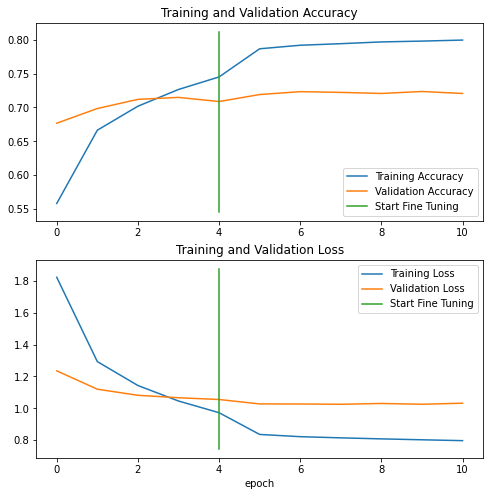

In [39]:
loss_curves_compare = compare_historys(history_foodvision, foodvison_fine_tune_history)

In [40]:
!tensorboard dev upload --logdir ./food_vision_training_logs \
  --name "Fine-tuning EfficientNetB0 on all Food101 Data" \
  --description "Training results for fine-tuning EfficientNetB0 on Food101 Data with learning rate 0.0001" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./food_vision_training_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 312, in run
    _run_main(main, args)
  File "/usr/local/lib/pyt

**FoodVision Tensorboard dev result**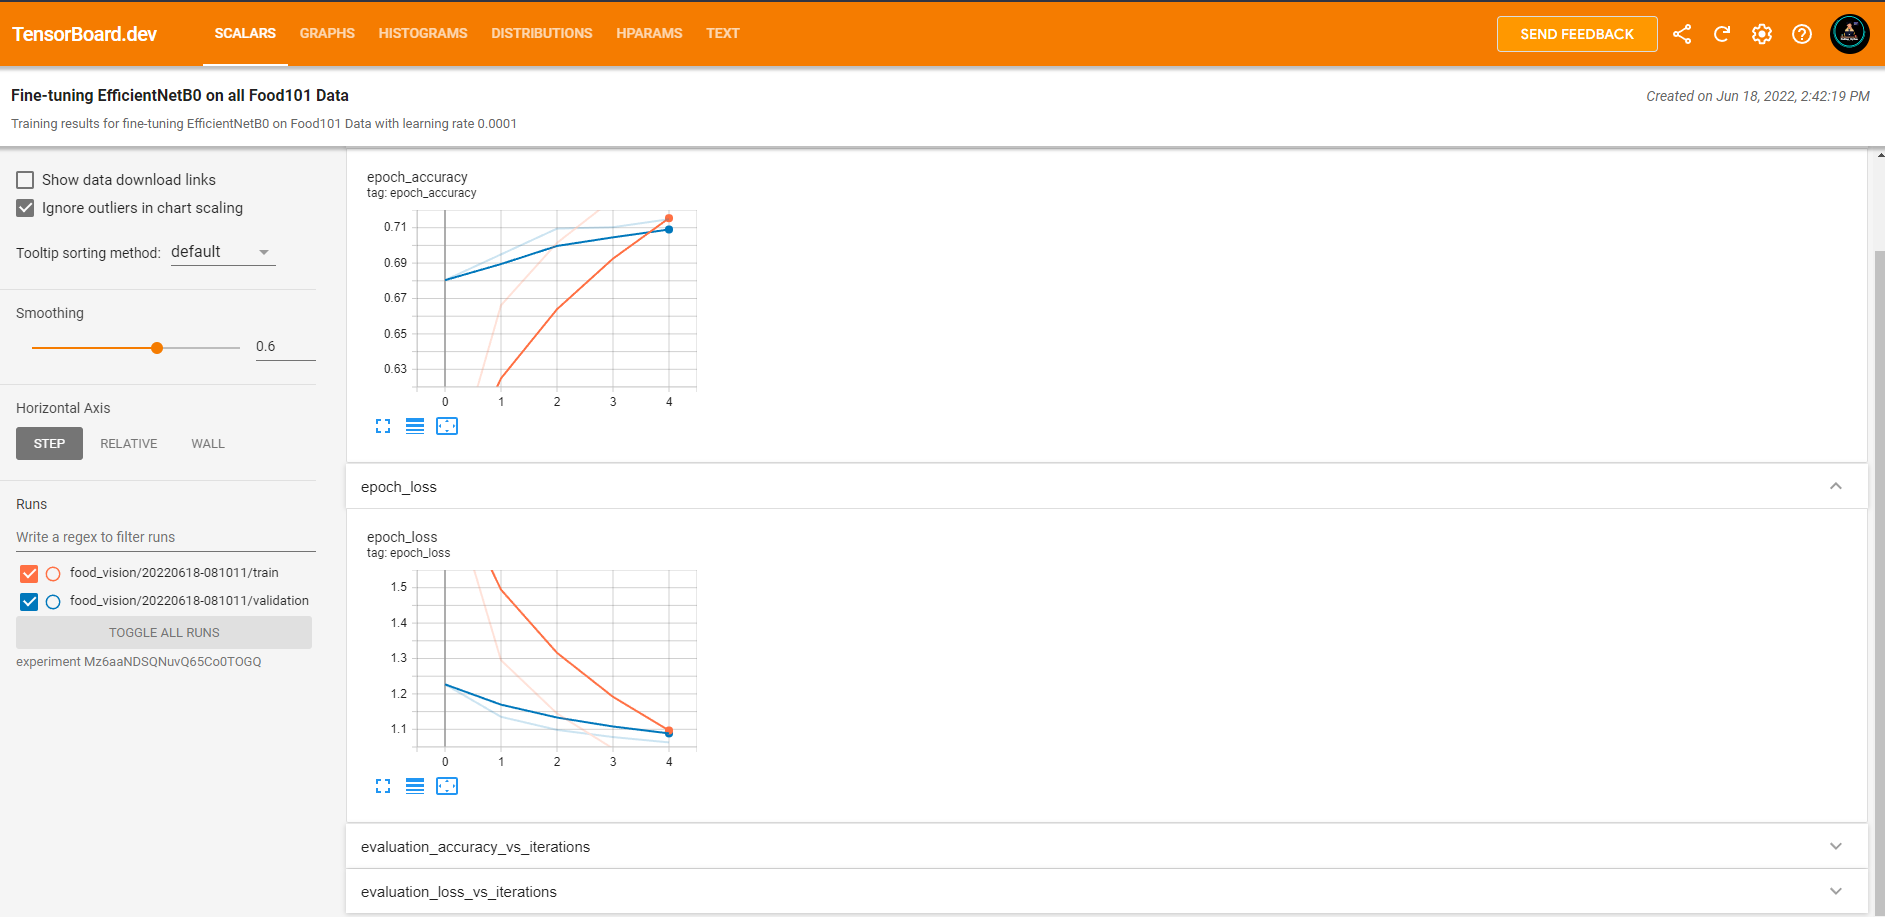

In [41]:
!tensorboard dev list


***** TensorBoard Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) no


## Creating confusion metrics and find out most wrong prediction with high pred probs

In [42]:
from sklearn.metrics import accuracy_score


In [ ]:
pred_probs = model_foodvision.predict(test_data)
pred_probs[1]

In [ ]:
def pred_info(prediction, sample_num, cls):
  print(f"len of prediction: {len(prediction)}")
  highest = prediction[sample_num].argmax()
  lowest = prediction[sample_num].argmin()
  hcls = cls[highest]
  print(f"Highest prediction: {highest} and it's belong to class: {hcls}")
  print(f"Lowest prediction: {lowest}")

In [ ]:
pred_info(pred_probs, 1, cls = class_names )

In [ ]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:50]

In [107]:
true_label = []
for image, labels in test_data.unbatch():
  true_label.append(labels)

In [116]:
new_label[1]

<tf.Tensor: shape=(), dtype=int64, numpy=75>

In [108]:
y = np.array(true_label)

### Confusion matrix of foodvision

In [49]:
# confusion matrix function
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_mat(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

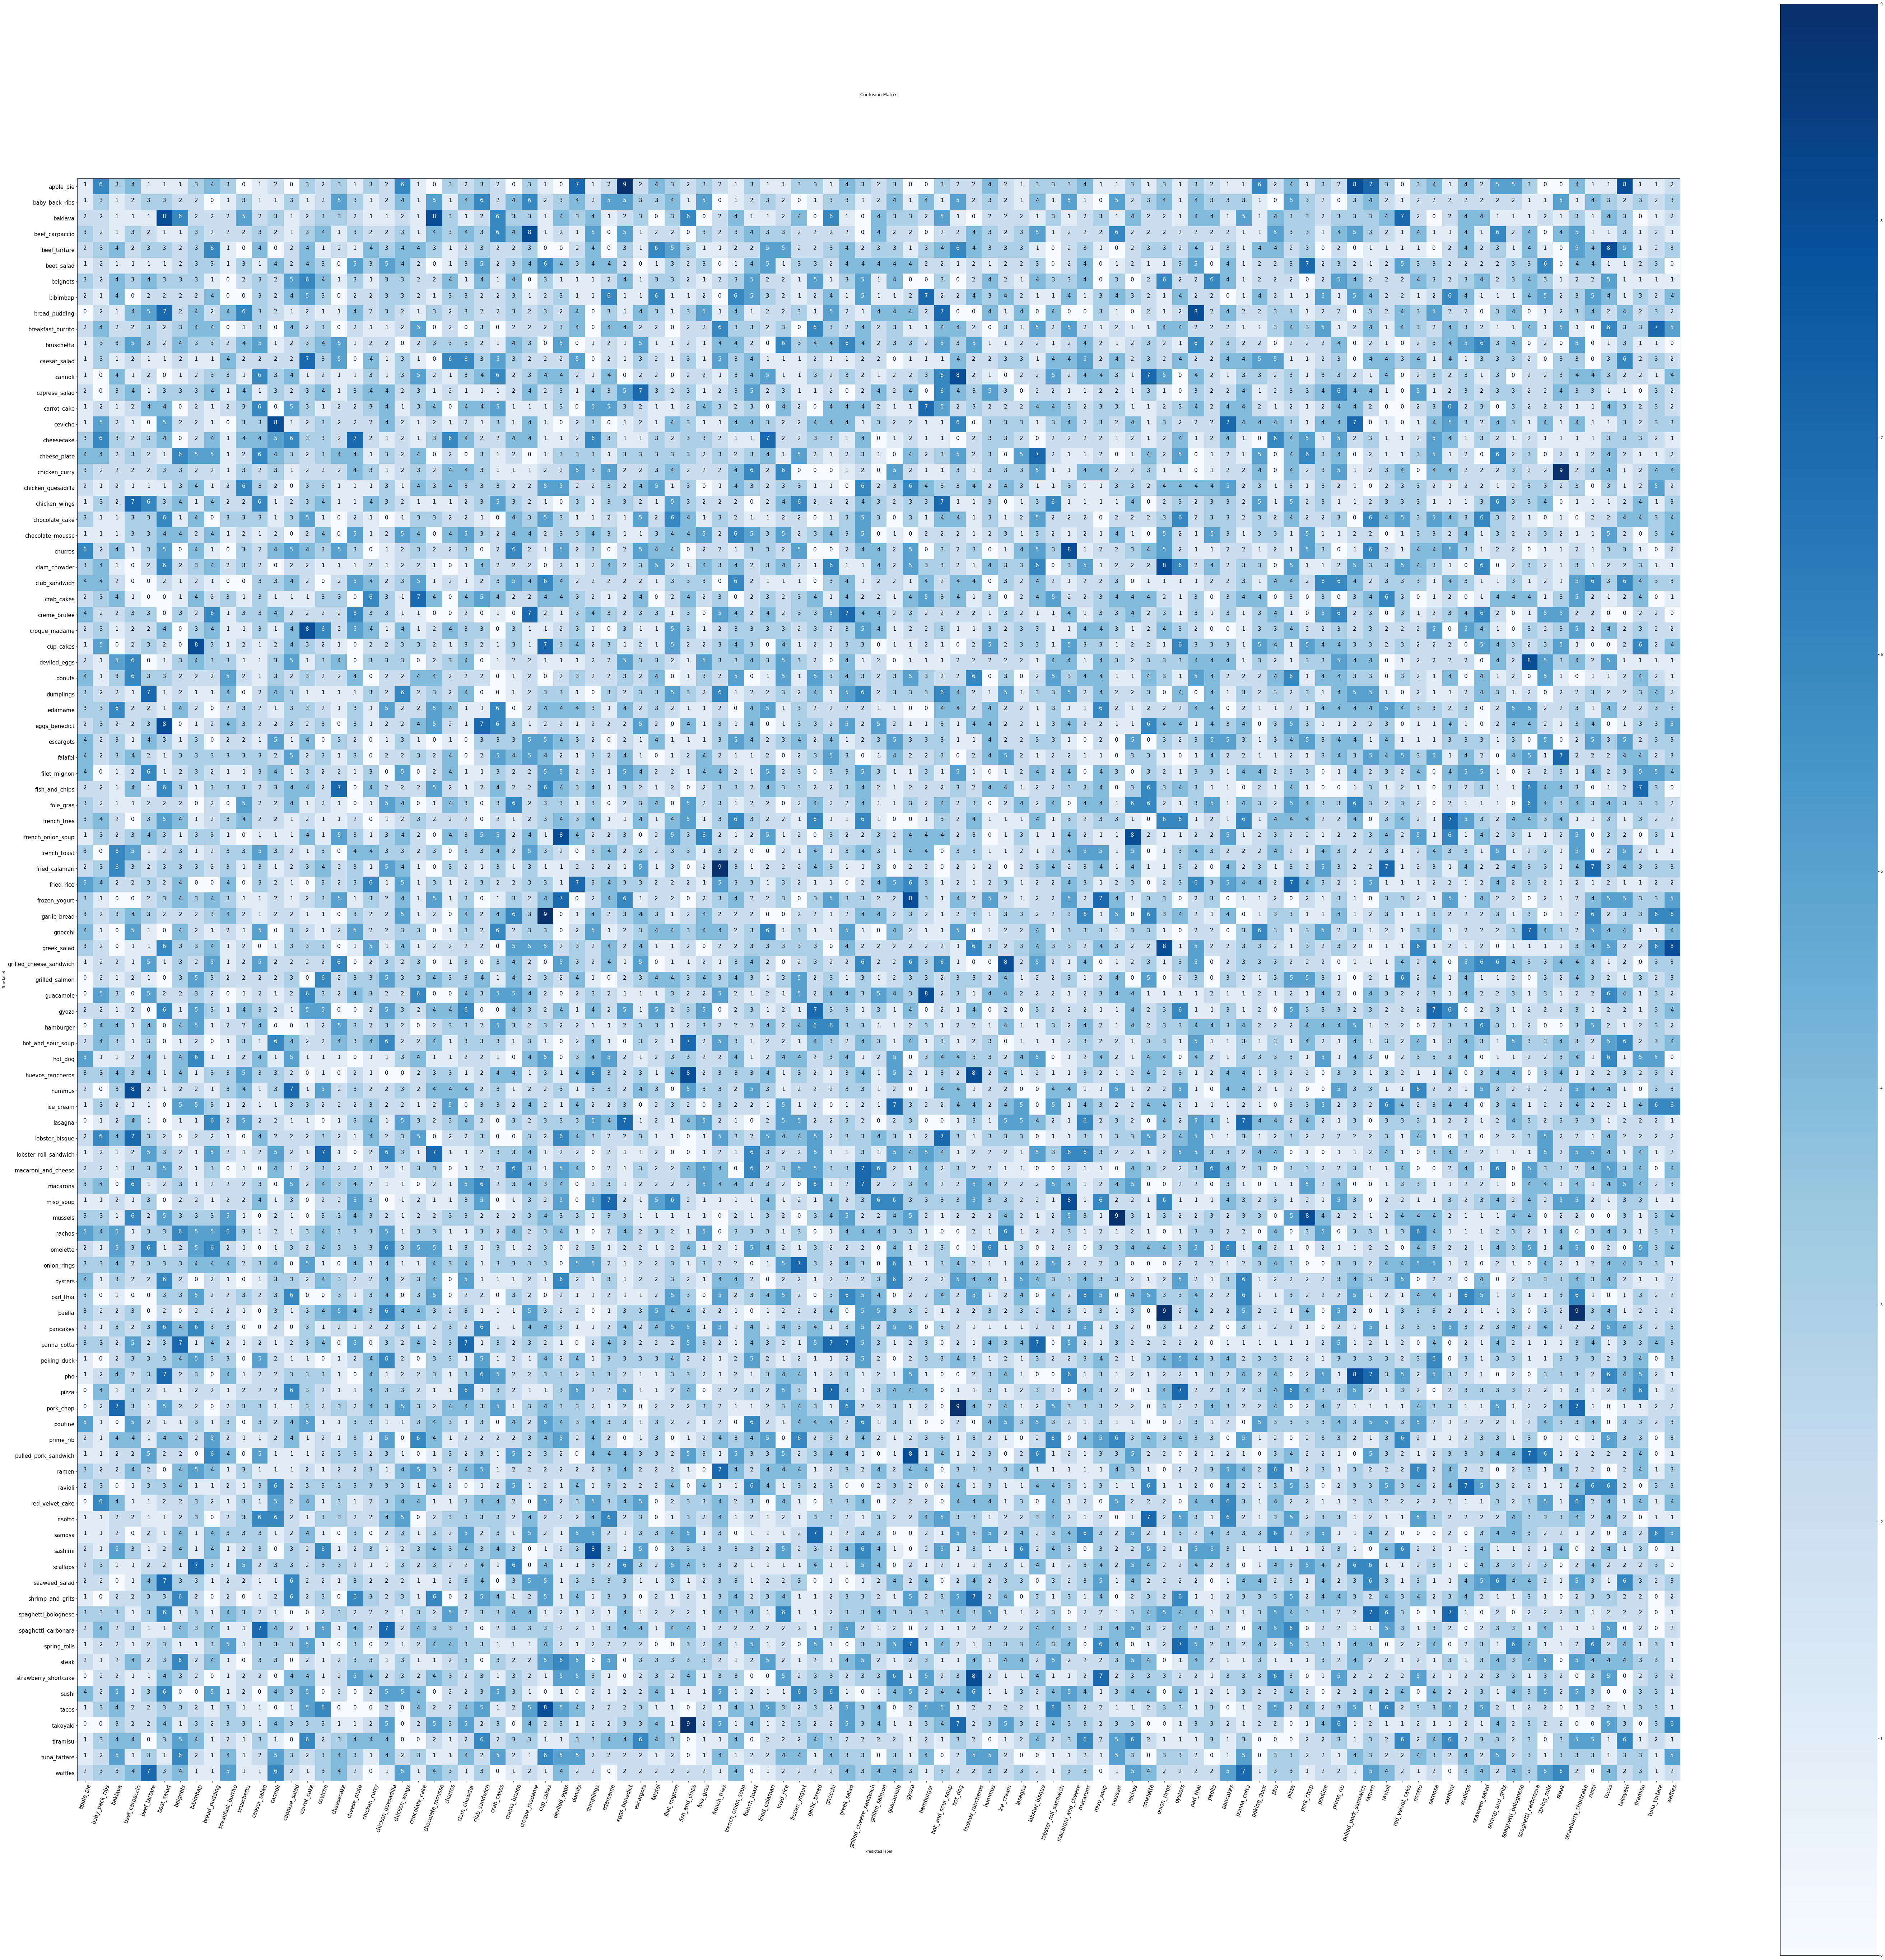

In [93]:
make_confusion_mat(y, pred_classes, class_names, figsize=(100,100))

**Accuracy score**

In [109]:
acc_score = accuracy_score(y,pred_classes)
acc_score

0.0100990099009901

## Classification report

In [117]:
from sklearn.metrics import classification_report
clss_report = classification_report(new_label, pred_classes)


In [118]:
print(clss_report)

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       250
           1       0.01      0.01      0.01       250
           2       0.00      0.00      0.00       250
           3       0.00      0.00      0.00       250
           4       0.01      0.01      0.01       250
           5       0.00      0.00      0.00       250
           6       0.02      0.02      0.02       250
           7       0.01      0.02      0.02       250
           8       0.01      0.01      0.01       250
           9       0.02      0.02      0.02       250
          10       0.01      0.01      0.01       250
          11       0.00      0.00      0.00       250
          12       0.00      0.00      0.00       250
          13       0.01      0.01      0.01       250
          14       0.01      0.01      0.01       250
          15       0.00      0.00      0.00       250
          16       0.01      0.01      0.01       250
          17       0.02    

## Predictioin

In [53]:
def load_and_prep(filepath, img_shape = 224, scale=True):
  """
  params:
        filepath - conatain the path of the file which is use for makeing 
                  predictions
        img_shape = take the size of which we need to our files/outputs 
        scale = make scale from 0-255 to 0-1
  return:
        return the output image of predictions
  
  """

  img = tf.io.read_file(filepath)
  img = tf.io.decode_image(img, 3)
  img = tf.image.resize(img, [img_shape, img_shape])

  if scale:
    return img/255.
  else:
    return img

In [54]:
!wget https://raw.githubusercontent.com/rahul-lyukbot/Helping_material/master/steakimg.jpg
!wget https://raw.githubusercontent.com/rahul-lyukbot/Helping_material/master/test_image/sushi.jpg
!wget https://raw.githubusercontent.com/rahul-lyukbot/Helping_material/master/test_image/Hamburger.jpg
!wget https://raw.githubusercontent.com/rahul-lyukbot/Helping_material/master/test_image/ramen.jpg

--2022-06-20 11:11:40--  https://raw.githubusercontent.com/rahul-lyukbot/Helping_material/master/steakimg.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2858914 (2.7M) [image/jpeg]
Saving to: ‘steakimg.jpg’

steakimg.jpg        100%[===================>]   2.73M  --.-KB/s    in 0.01s   

2022-06-20 11:11:40 (242 MB/s) - ‘steakimg.jpg’ saved [2858914/2858914]

--2022-06-20 11:11:40--  https://raw.githubusercontent.com/rahul-lyukbot/Helping_material/master/test_image/sushi.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193